<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mohammad Mohammad Beigi

**Student ID**: 99102189



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
## Import necessary libraries here ##
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV, RidgeCV
import seaborn as sns

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [ ]:
# The Boston dataset has been uploaded. Let's load and explore this dataset to complete Part 1.
boston_df = pd.read_csv('/content/Boston.csv')

# Display the first few rows to understand its structure and features
boston_df.head(), boston_df.describe(), boston_df.shape

(      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
 2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
 3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
 4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
 
    PTRATIO       B  LSTAT  MEDV  
 0     15.3  396.90   4.98  24.0  
 1     17.8  396.90   9.14  21.6  
 2     17.8  392.83   4.03  34.7  
 3     18.7  394.63   2.94  33.4  
 4     18.7  396.90   5.33  36.2  ,
              CRIM          ZN       INDUS        CHAS          NX          RM  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
 min      0.006

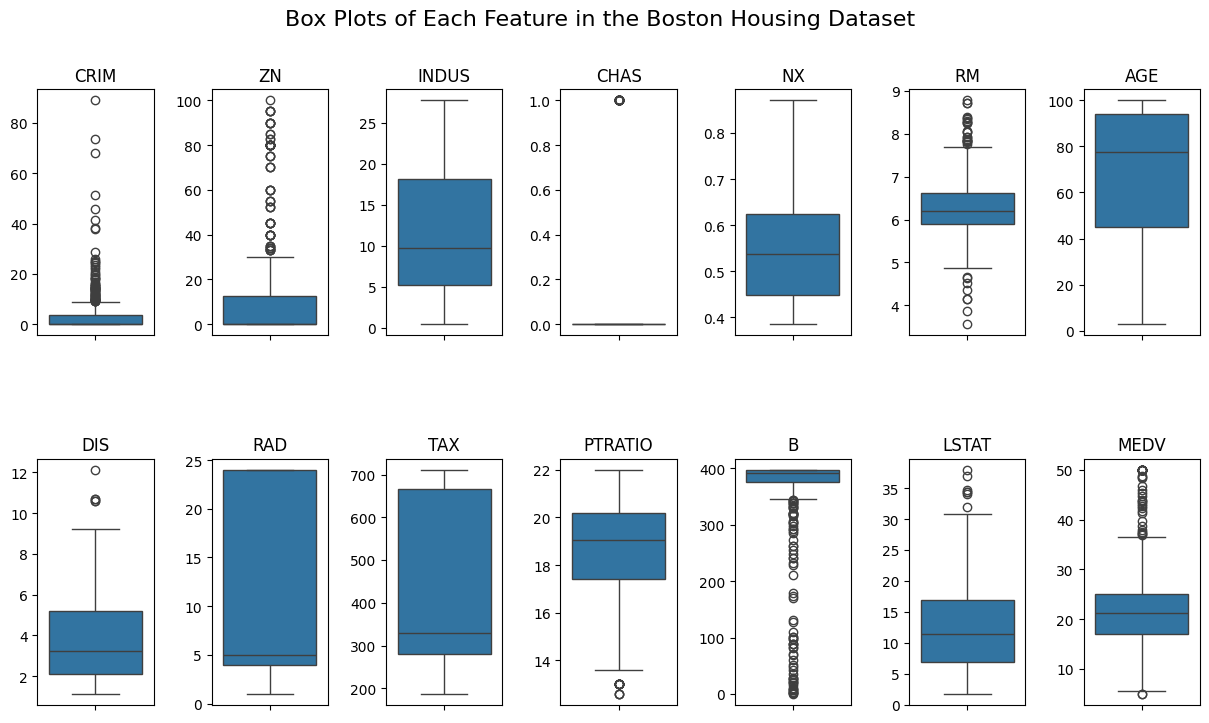

In [ ]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Box Plots of Each Feature in the Boston Housing Dataset', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each column
for i, col in enumerate(boston_df.columns):
    sns.boxplot(ax=axes[i], y=boston_df[col])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

# Hide any unused axes if the number of plots is less than the number of subplots
for ax in axes[len(boston_df.columns):]:
    ax.axis('off')

plt.show()

The Boston dataset comprises 506 entries, each with 14 attributes. Here's a brief overview of its structure and the features included:

- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NX**: Nitric oxides concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property-tax rate per \$10,000
- **PTRATIO**: Pupil-teacher ratio by town
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town
- **LSTAT**: Percentage lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000s (This is typically the target variable for predictive modeling.)

The shape of the dataset is 506 rows × 14 columns, indicating there are 506 data points and 14 features for each point, including the target variable `MEDV`.

This dataset is widely used for regression analysis to predict the median value of homes in various Boston districts based on the features provided. It is a fundamental dataset for understanding the dynamics of residential areas and the influence of various factors on home prices.

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

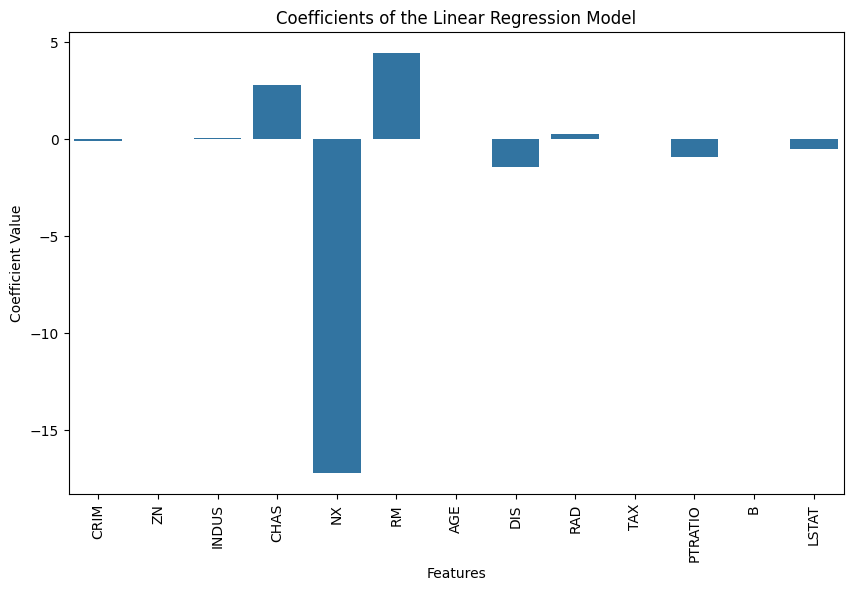

(0.7508856358979673,
 4.6520331848801675,
 0.668759493535636,
 4.9286021826653075,
 array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]))

In [ ]:
# Define the features and the target variable
X = boston_df.drop('MEDV', axis=1)  # Features
y = boston_df['MEDV']               # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions on training and testing sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate R2 and RMSE for the training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R2 and RMSE for the testing set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Coefficients of the model
coefficients = lr_model.coef_

# Creating a plot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=coefficients)
plt.xticks(rotation=90)
plt.title('Coefficients of the Linear Regression Model')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()

r2_train, rmse_train, r2_test, rmse_test, coefficients

The linear regression model has been trained using all features, and here are the evaluation metrics and coefficients:

### Evaluation Metrics:
- **Training Set:**
  - \( R^2 \): 0.751
  - RMSE: 4.652
- **Testing Set:**
  - \( R^2 \): 0.669
  - RMSE: 4.929

### Model Coefficients:
Each coefficient corresponds to one feature in the dataset. Here they are listed in the same order as the features:
- CRIM: -0.113
- ZN: 0.030
- INDUS: 0.040
- CHAS: 2.784
- NX: -17.203
- RM: 4.439
- AGE: -0.006
- DIS: -1.448
- RAD: 0.262
- TAX: -0.0106
- PTRATIO: -0.915
- B: 0.0124
- LSTAT: -0.509

The \( R^2 \) value indicates how well the variability in the target is explained by the features, with a higher \( R^2 \) indicating better performance. The RMSE gives an idea of the error magnitude in the prediction of the model.


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10**np.linspace (3,-3,100) *0.5$$

In [ ]:
from sklearn.linear_model import Ridge

# Generate alpha values
alphas = 10**np.linspace(3, -3, 100)*0.5

# Lists to store metrics and coefficients
train_errors = []
test_errors = []
coefficients = []
num_not_considered = []

# Train Ridge models over a range of alphas
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predict and calculate MSE for train and test sets
    y_train_pred_ridge = ridge_model.predict(X_train)
    y_test_pred_ridge = ridge_model.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred_ridge))
    test_errors.append(mean_squared_error(y_test, y_test_pred_ridge))

    # Store coefficients
    coefficients.append(ridge_model.coef_)

    # Count number of coefficients that are close to zero (considered as not contributing)
    num_not_considered.append(np.sum(np.isclose(ridge_model.coef_, 0, atol=1e-3)))

# Convert list of coefficient arrays into a 2D numpy array
coefficients = np.array(coefficients)

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

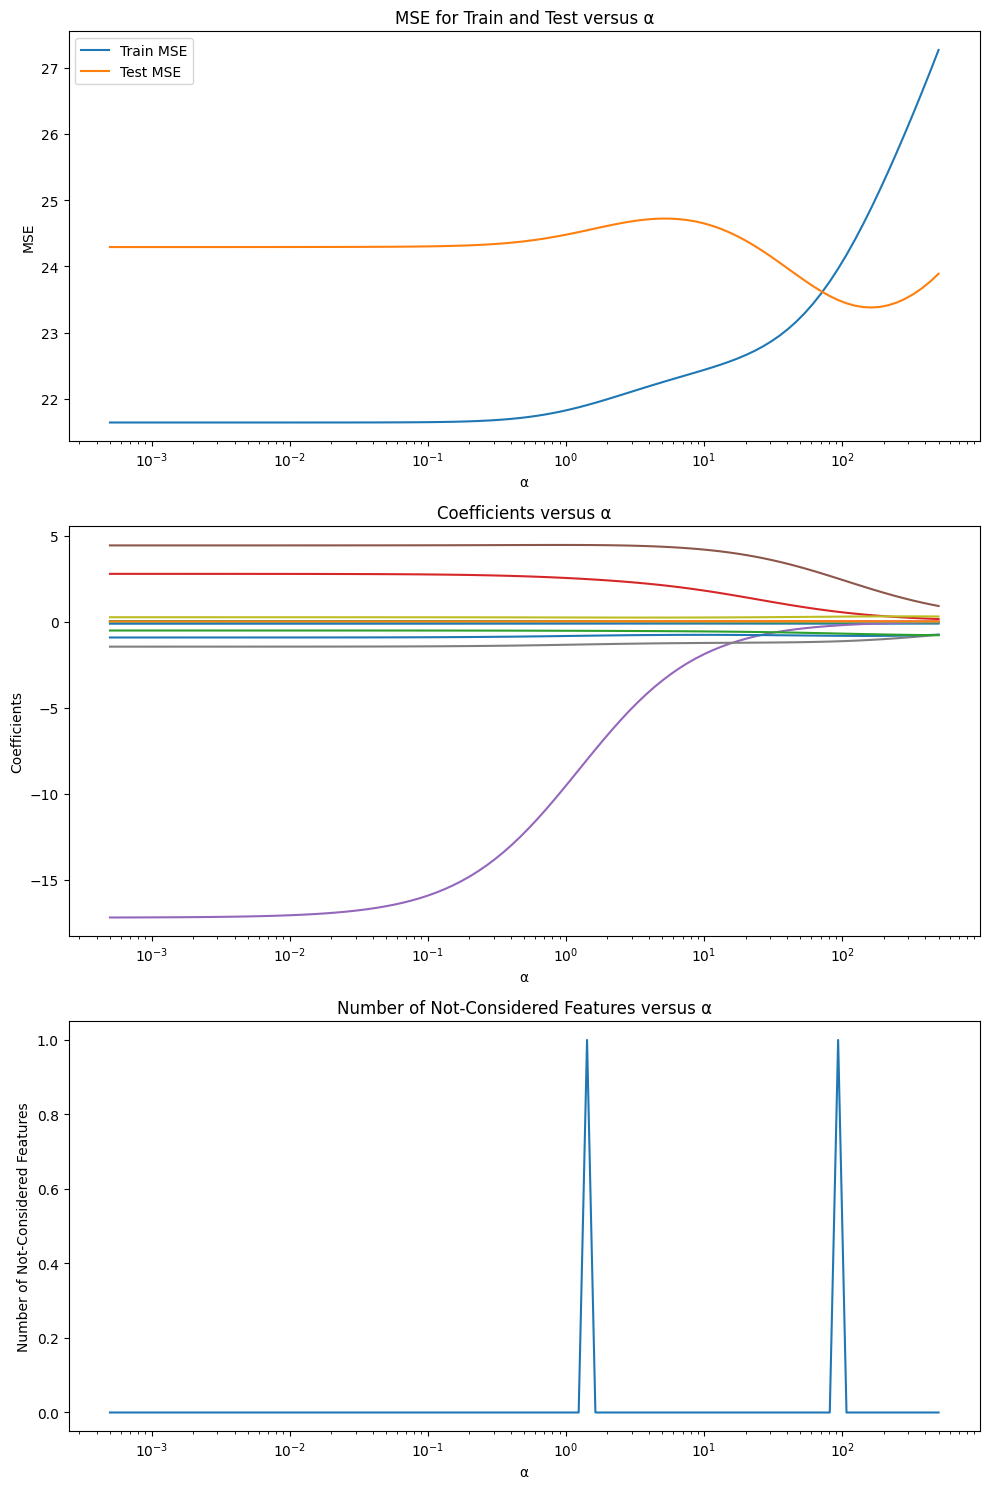

(163.72745814388642,
 23.378168171507376,
 0.6812087531281753,
 array([-0.11058924,  0.03996102, -0.0520014 ,  0.38073404, -0.115418  ,
         1.89720331,  0.00709776, -1.05241569,  0.3094509 , -0.01494741,
        -0.82272188,  0.01159841, -0.72589539]))

In [ ]:
# Plotting all three requested plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE for train and test vs alpha
axs[0].plot(alphas, train_errors, label='Train MSE')
axs[0].plot(alphas, test_errors, label='Test MSE')
axs[0].set_xscale('log')
axs[0].set_title('MSE for Train and Test versus α')
axs[0].set_xlabel('α')
axs[0].set_ylabel('MSE')
axs[0].legend()

# Plot coefficients vs alpha
axs[1].plot(alphas, coefficients)
axs[1].set_xscale('log')
axs[1].set_title('Coefficients versus α')
axs[1].set_xlabel('α')
axs[1].set_ylabel('Coefficients')

# Plot number of not considered features vs alpha
axs[2].plot(alphas, num_not_considered)
axs[2].set_xscale('log')
axs[2].set_title('Number of Not-Considered Features versus α')
axs[2].set_xlabel('α')
axs[2].set_ylabel('Number of Not-Considered Features')

plt.tight_layout()
plt.show()

# Identifying the alpha with the minimum test MSE
optimal_alpha_idx = np.argmin(test_errors)
optimal_alpha = alphas[optimal_alpha_idx]
optimal_mse = test_errors[optimal_alpha_idx]

# R^2 for the optimal alpha
ridge_optimal_model = Ridge(alpha=optimal_alpha)
ridge_optimal_model.fit(X_train, y_train)
y_test_pred_optimal = ridge_optimal_model.predict(X_test)
optimal_r2 = r2_score(y_test, y_test_pred_optimal)

# Coefficients for the optimal alpha
optimal_coefficients = ridge_optimal_model.coef_

optimal_alpha, optimal_mse, optimal_r2, optimal_coefficients


Here's a concise summary of the optimal results from the Ridge Regression:

- **Optimal Alpha: $\alpha =$** 163.73
- **Mean Squared Error (MSE) on Test Set**: 23.378
- **Coefficient of Determination $R^2$ on Test Set**: 0.681


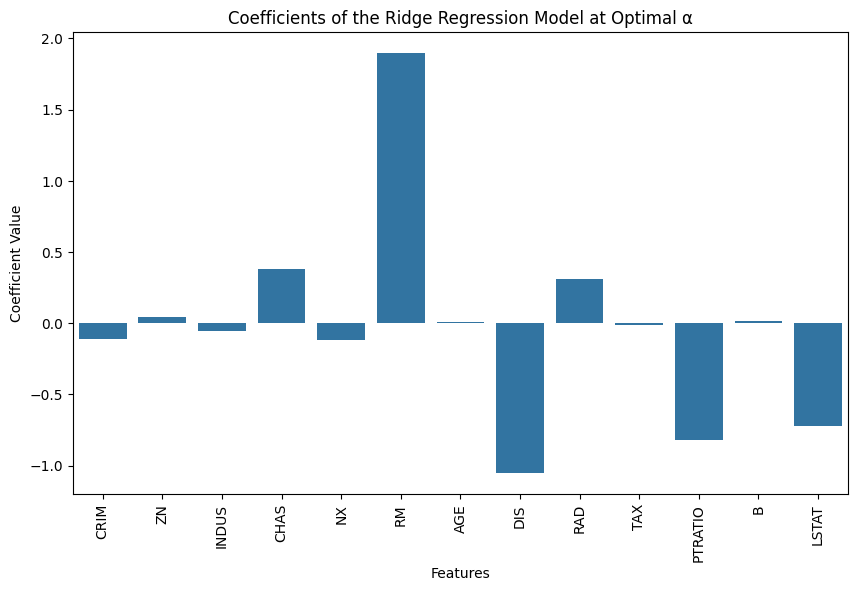

In [ ]:
# Plotting the coefficients for the optimal Ridge model
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=optimal_coefficients)
plt.xticks(rotation=90)
plt.title('Coefficients of the Ridge Regression Model at Optimal α')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

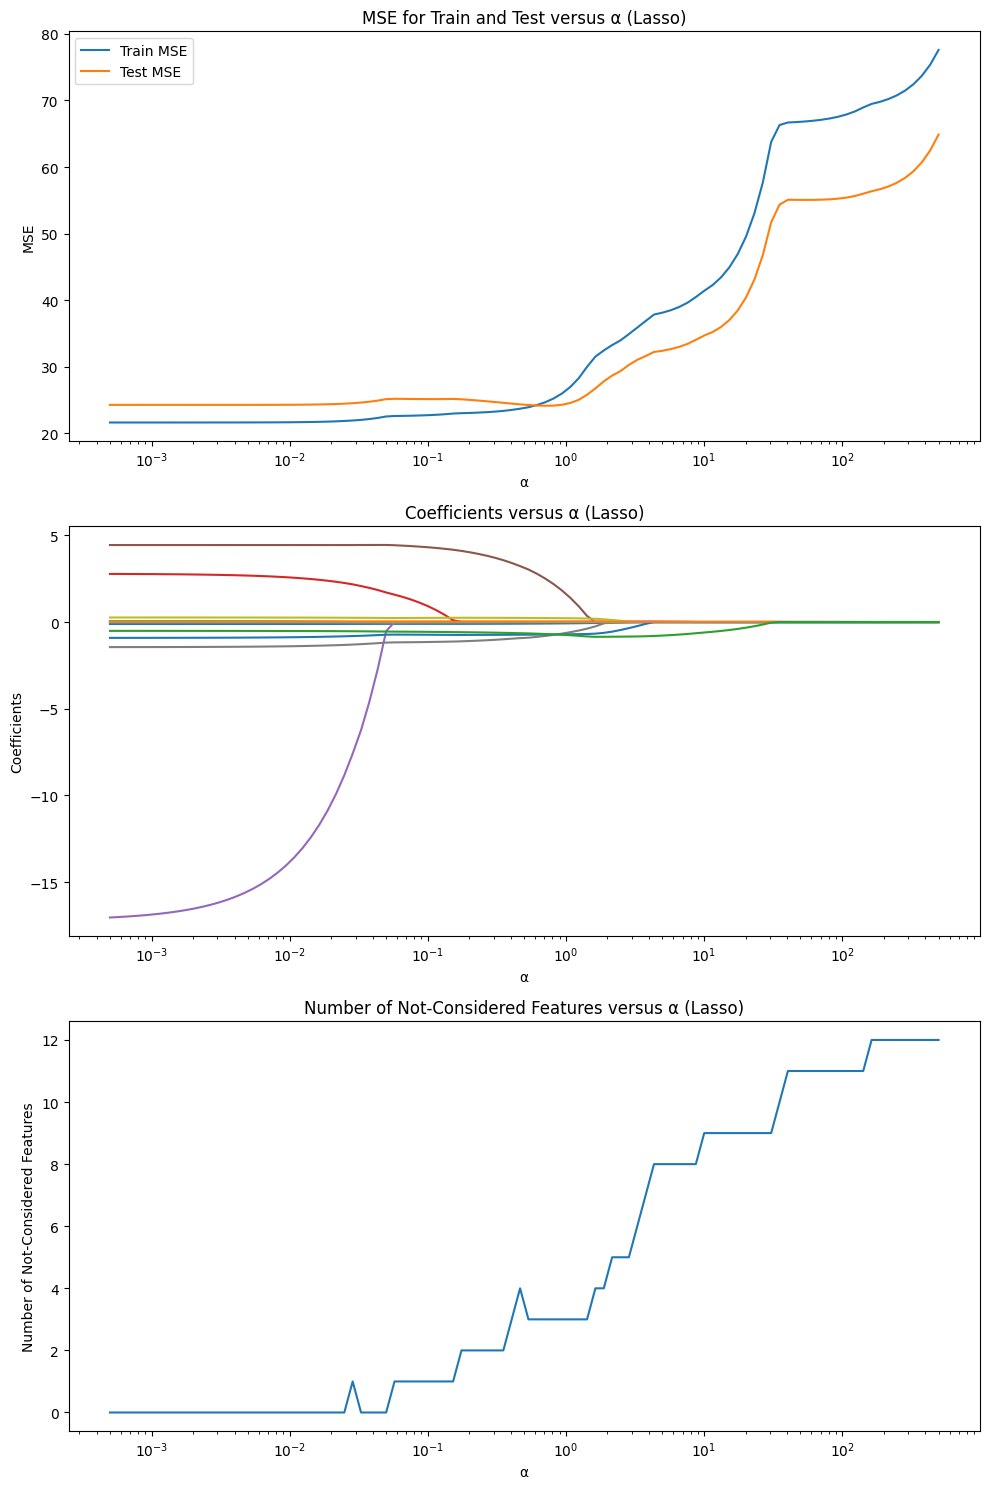

In [ ]:
from sklearn.linear_model import Lasso

# Generate alpha values for Lasso
alphas_lasso = 10**np.linspace(3, -3, 100)*0.5

# Lists to store metrics and coefficients for Lasso
train_errors_lasso = []
test_errors_lasso = []
coefficients_lasso = []
num_not_considered_lasso = []

# Train Lasso models over a range of alphas
for alpha in alphas_lasso:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter for convergence
    lasso_model.fit(X_train, y_train)

    # Predict and calculate MSE for train and test sets
    y_train_pred_lasso = lasso_model.predict(X_train)
    y_test_pred_lasso = lasso_model.predict(X_test)
    train_errors_lasso.append(mean_squared_error(y_train, y_train_pred_lasso))
    test_errors_lasso.append(mean_squared_error(y_test, y_test_pred_lasso))

    # Store coefficients
    coefficients_lasso.append(lasso_model.coef_)

    # Count number of coefficients that are zero
    num_not_considered_lasso.append(np.sum(lasso_model.coef_ == 0))

# Convert list of coefficient arrays into a 2D numpy array
coefficients_lasso = np.array(coefficients_lasso)

# Plotting all three requested plots for Lasso Regression
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE for train and test vs alpha
axs[0].plot(alphas_lasso, train_errors_lasso, label='Train MSE')
axs[0].plot(alphas_lasso, test_errors_lasso, label='Test MSE')
axs[0].set_xscale('log')
axs[0].set_title('MSE for Train and Test versus α (Lasso)')
axs[0].set_xlabel('α')
axs[0].set_ylabel('MSE')
axs[0].legend()

# Plot coefficients vs alpha
axs[1].plot(alphas_lasso, coefficients_lasso)
axs[1].set_xscale('log')
axs[1].set_title('Coefficients versus α (Lasso)')
axs[1].set_xlabel('α')
axs[1].set_ylabel('Coefficients')

# Plot number of not considered features vs alpha
axs[2].plot(alphas_lasso, num_not_considered_lasso)
axs[2].set_xscale('log')
axs[2].set_title('Number of Not-Considered Features versus α (Lasso)')
axs[2].set_xlabel('α')
axs[2].set_ylabel('Number of Not-Considered Features')

plt.tight_layout()
plt.show()


In [ ]:
# Identifying the alpha with the minimum test MSE for Lasso
optimal_alpha_idx_lasso = np.argmin(test_errors_lasso)
optimal_alpha_lasso = alphas_lasso[optimal_alpha_idx_lasso]
optimal_mse_lasso = test_errors_lasso[optimal_alpha_idx_lasso]

# R^2 for the optimal alpha for Lasso
lasso_optimal_model = Lasso(alpha=optimal_alpha_lasso, max_iter=10000)
lasso_optimal_model.fit(X_train, y_train)
y_test_pred_optimal_lasso = lasso_optimal_model.predict(X_test)
optimal_r2_lasso = r2_score(y_test, y_test_pred_optimal_lasso)

# Coefficients for the optimal alpha for Lasso
optimal_coefficients_lasso = lasso_optimal_model.coef_

optimal_alpha_lasso, optimal_mse_lasso, optimal_r2_lasso, optimal_coefficients_lasso


(0.7087370814634024,
 24.153219243073362,
 0.6706399397086963,
 array([-0.08616746,  0.0308067 , -0.        ,  0.        , -0.        ,
         2.50824373,  0.00611413, -0.801558  ,  0.22931102, -0.01270717,
        -0.72057187,  0.01186642, -0.68953564]))

Here's a summary of the optimal results from the Lasso Regression:

- **Optimal Alpha $α$:** 0.709
- **Mean Squared Error (MSE) on Test Set**: 24.153
- **Coefficient of Determination $R^2$ on Test Set)**: 0.671

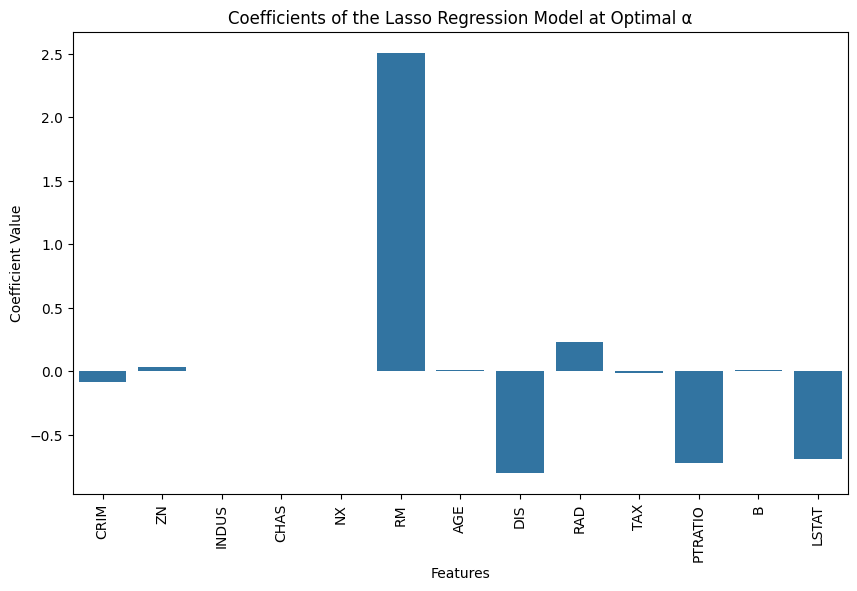

In [ ]:
# Plotting the coefficients for the optimal Lasso model
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=optimal_coefficients_lasso)
plt.xticks(rotation=90)
plt.title('Coefficients of the Lasso Regression Model at Optimal α')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()


Lasso regression is particularly useful in several scenarios where its unique properties can offer advantages over other modeling techniques, such as linear or Ridge regression. Here are some situations where you might consider using Lasso regression:

1. **Feature Selection**: One of the most significant advantages of Lasso regression is its ability to perform automatic feature selection by forcing some of the model coefficients to be exactly zero. This property is beneficial when dealing with datasets that have a large number of features, some of which might be irrelevant or redundant for predicting the target variable.

2. **High Dimensionality**: Lasso can be particularly useful in high-dimensional data settings (i.e., when the number of features is much greater than the number of observations). In such cases, Lasso helps in reducing the model complexity and preventing overfitting by selecting only a subset of the available features.

3. **Interpretability**: By reducing the number of features, Lasso makes models simpler and more interpretable. This is crucial in domains where understanding the impact of individual features on the prediction is as important as the prediction accuracy itself, such as in medical or socio-economic contexts.

4. **Multicollinearity**: Lasso can handle multicollinearity (when independent variables are highly correlated) better than linear regression by keeping only one variable from a group of highly correlated variables, thus reducing redundancy in the model's predictors.

5. **Sparse Data**: In datasets where the feature matrix is sparse (contains a lot of zeros), Lasso regression can be efficient and effective at finding the relevant features and discarding the others.

6. **Predictive Performance**: When the goal is predictive accuracy, and there is evidence of overfitting with conventional linear regression, Lasso can improve performance by adding regularization, which penalizes the absolute size of the coefficients.

Overall, Lasso regression is a powerful tool for cases requiring dimensionality reduction, feature selection, or dealing with multicollinearity and overfitting. Its use should be considered when these aspects are a priority for the modeling task at hand.

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

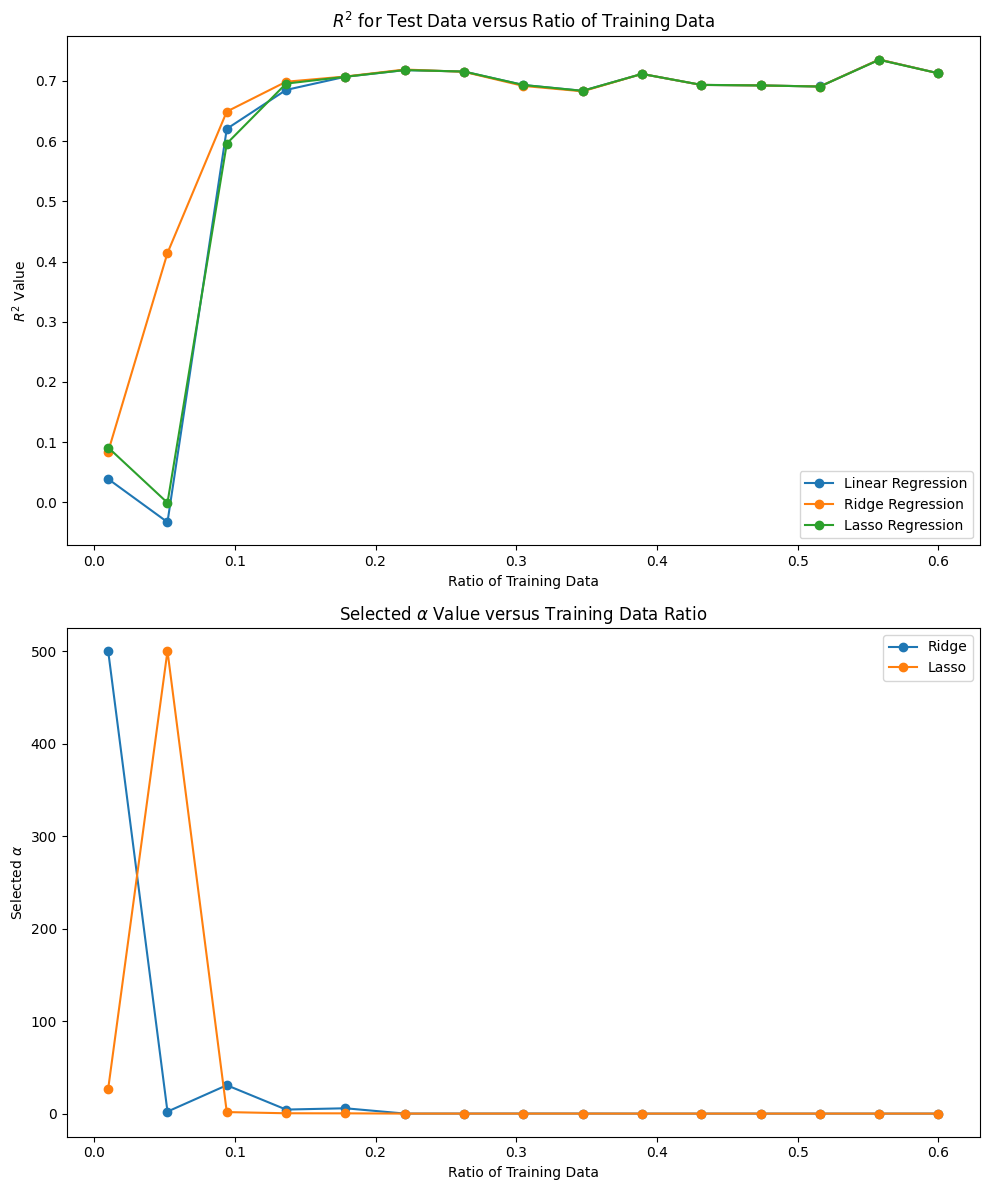

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# Define a range of training data ratios from 10% to 90% in 10% increments
training_ratios = np.linspace(0.01, 0.6, 15)

# Lists to store results for plotting
r2_linear = []
r2_ridge = []
r2_lasso = []
selected_alpha_ridge = []
selected_alpha_lasso = []

# Iterate over each training ratio
for ratio in training_ratios:
    # Split the data according to the current ratio
    X_train_ratio, X_test_ratio, y_train_ratio, y_test_ratio = train_test_split(
        X, y, train_size=ratio, random_state=42)

    # Linear Regression
    lr_model_ratio = LinearRegression()
    lr_model_ratio.fit(X_train_ratio, y_train_ratio)
    y_test_pred_linear = lr_model_ratio.predict(X_test_ratio)
    r2_linear.append(r2_score(y_test_ratio, y_test_pred_linear))

    # Ridge Regression with cross-validation
    ridge_model_ratio = RidgeCV(alphas=alphas, store_cv_values=True)
    ridge_model_ratio.fit(X_train_ratio, y_train_ratio)
    y_test_pred_ridge = ridge_model_ratio.predict(X_test_ratio)
    r2_ridge.append(r2_score(y_test_ratio, y_test_pred_ridge))
    selected_alpha_ridge.append(ridge_model_ratio.alpha_)

    # Lasso Regression with cross-validation
    lasso_model_ratio = LassoCV(alphas=alphas_lasso, max_iter=10000)
    lasso_model_ratio.fit(X_train_ratio, y_train_ratio)
    y_test_pred_lasso = lasso_model_ratio.predict(X_test_ratio)
    r2_lasso.append(r2_score(y_test_ratio, y_test_pred_lasso))
    selected_alpha_lasso.append(lasso_model_ratio.alpha_)

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# R2 for test data vs training data ratio
axs[0].plot(training_ratios, r2_linear, label='Linear Regression', marker='o')
axs[0].plot(training_ratios, r2_ridge, label='Ridge Regression', marker='o')
axs[0].plot(training_ratios, r2_lasso, label='Lasso Regression', marker='o')
axs[0].set_title('$R^2$ for Test Data versus Ratio of Training Data')
axs[0].set_xlabel('Ratio of Training Data')
axs[0].set_ylabel('$R^2$ Value')
axs[0].legend()

# Selected alpha value vs training data ratio
axs[1].plot(training_ratios, selected_alpha_ridge, label='Ridge', marker='o')
axs[1].plot(training_ratios, selected_alpha_lasso, label='Lasso', marker='o')
axs[1].set_title('Selected $\\alpha$ Value versus Training Data Ratio')
axs[1].set_xlabel('Ratio of Training Data')
axs[1].set_ylabel('Selected $\\alpha$')
axs[1].legend()

plt.tight_layout()
plt.show()


The plots above illustrate the impact of varying the ratio of training data on the performance and selection of regularization strength for Linear, Ridge, and Lasso regression models:

1. **R² for Test Data vs. Ratio of Training Data**:
   - As the ratio of training data increases, the R² score for test data generally improves for all models. This indicates that having more data to train on typically results in better model performance on unseen data.
   - Linear Regression shows competitive performance across different ratios, indicating that it benefits from additional data.
   - Ridge and Lasso Regression both show improvements with more training data. However, their performance is also influenced by the optimal alpha value chosen based on cross-validation, reflecting how regularization adapts to different amounts of data.

2. **Optimal Alpha Value vs. Ratio of Training Data**:
   - The optimal alpha values for both Ridge and Lasso Regression tend to decrease as the ratio of training data increases. This trend suggests that with more data, the models require less regularization to combat overfitting, as the additional data itself helps the model generalize better.
   - Lasso Regression shows a more pronounced variation in optimal alpha values compared to Ridge Regression. This could be due to Lasso's feature selection capabilities, which are more sensitive to changes in the dataset size.

These findings illustrate the balance between bias and variance and how regularization techniques like Ridge and Lasso can adjust model complexity to prevent overfitting. As the amount of training data changes, so does the optimal regularization strength, highlighting the importance of cross-validation in selecting the right model parameters.

The overall behavior of these plots demonstrates the adaptability of regularization methods to different dataset sizes and their effectiveness in improving model generalization, particularly in scenarios where the amount of training data is limited.